In [3]:
from google.colab import files 
uploaded = files.upload()

Saving 2010new.txt to 2010new.txt
Saving 2018burn.txt to 2018burn.txt
Saving age.txt to age.txt
Saving food_waste.txt to food_waste.txt
Saving gdp.csv to gdp.csv
Saving gdp_seoul.csv to gdp_seoul.csv
Saving household.txt to household.txt
Saving incineration.txt to incineration.txt
Saving recycle.txt to recycle.txt
Saving seoul_res.txt to seoul_res.txt
Saving Seoul_waste.txt to Seoul_waste.txt
Saving single_person.txt to single_person.txt
Saving workplace.txt to workplace.txt


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False
from scipy.stats import chi2_contingency
from scipy import stats
from scipy.stats import ttest_ind
import warnings
warnings.filterwarnings("ignore")
%config InlineBackend.figure_format='retina'


In [ ]:
# 기본 데이터 df : 기간', '지역', '주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일)', '생활폐기물 배출량(톤/일)', '주민수(명)'
df = pd.read_csv('Seoul_waste.txt', error_bad_lines=False, sep = '\t', thousands = ',')
df 

,기간,지역,주민 1인당 생활폐기물(쓰레기) 배출량(㎏/인/일),생활폐기물 배출량(톤/일),주민수(명)
0,2009,계,1.08,11336.8,10464051
1,2009,종로구,2.17,385.4,177543
2,2009,중구,3.54,487.4,137861
3,2009,용산구,1.30,326.7,251200
4,2009,성동구,0.99,312.5,316064
...,...,...,...,...,...
255,2018,관악구,0.84,436.8,520040
256,2018,서초구,1.29,563.7,438163
257,2018,강남구,1.24,677.1,547453
258,2018,송파구,0.91,611.8,673507


In [ ]:
df.columns = ['기간', '지역구', '1인당 생활폐기물 배출량', '생활폐기물 배출량', '주민수']
#칼럼들의 이름을 바꿔준다.

df = df.replace('계', '서울특별시')
#value '계'를 '서울시'로 바꿔준다



df.dtypes
df['생활폐기물 배출량'] = df['생활폐기물 배출량'].astype(int)

In [ ]:
dff = df.copy()
#df 데이터 분석을 위해 dff로 copy

In [ ]:
dff.corr()
#상관관계를 확인. 주민수와 생활폐기물 배출량의 양의 상관관계를 확인.
#여기서 한가지 의문은 1인당 생활폐기물 배출량과 주민수의 상관관계가 낮은 것.
#주민수가 늘어난다면 당연히 쓰레기의 배출량은 늘지만 1인당 평균 배출량은 주민수 보다는 다른 변수에 영향을 더 받는 것일까? 의문


,기간,1인당 생활폐기물 배출량,생활폐기물 배출량,주민수
기간,1.000000,-0.027647,-0.014719,-0.006271
1인당 생활폐기물 배출량,-0.027647,1.000000,0.000011,-0.070664
생활폐기물 배출량,-0.014719,0.000011,1.000000,0.994108
주민수,-0.006271,-0.070664,0.994108,1.000000


In [ ]:
#dff.corr() 시각화를 위해 한국어 패치.
import matplotlib.font_manager as fm  # 폰트 관련 용도


sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 48
['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-Bold.ttf', '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf', '/usr/share/fonts/truetype/nanum/NanumGothic.ttf', '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf', '/usr/share/fonts/truetype/liberation/LiberationSans-BoldItalic.ttf', '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Bold.ttf', '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf', '/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf', '/usr/share/fonts/truetype/nanum/NanumBrush.ttf', '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.

In [ ]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

In [ ]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")
nanum_font

sys_font number: 48
nanum_font number: 31


['/usr/share/fonts/truetype/nanum/NanumSquareRoundR.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicUltraLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareL.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBarunGothicBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothic.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEco.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjo.ttf',
 '/usr/share/fonts/truetype/nanum/NanumBrush.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareRoundB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicEcoExtraBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicCoding-Bold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumMyeongjoEcoBold.ttf',
 '/usr/share/fonts/truetype/nanum/NanumSquareEB.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicLight.ttf',
 '/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf',
 '/usr/share/font

In [ ]:
path = '/usr/share/fonts/truetype/nanum/NanumSquareB.ttf'  # 설치된 나눔글꼴중 원하는 녀석의 전체 경로를 가져오자
font_name = fm.FontProperties(fname=path, size=10).get_name()
print(font_name)
plt.rc('font', family=font_name)
fm._rebuild()

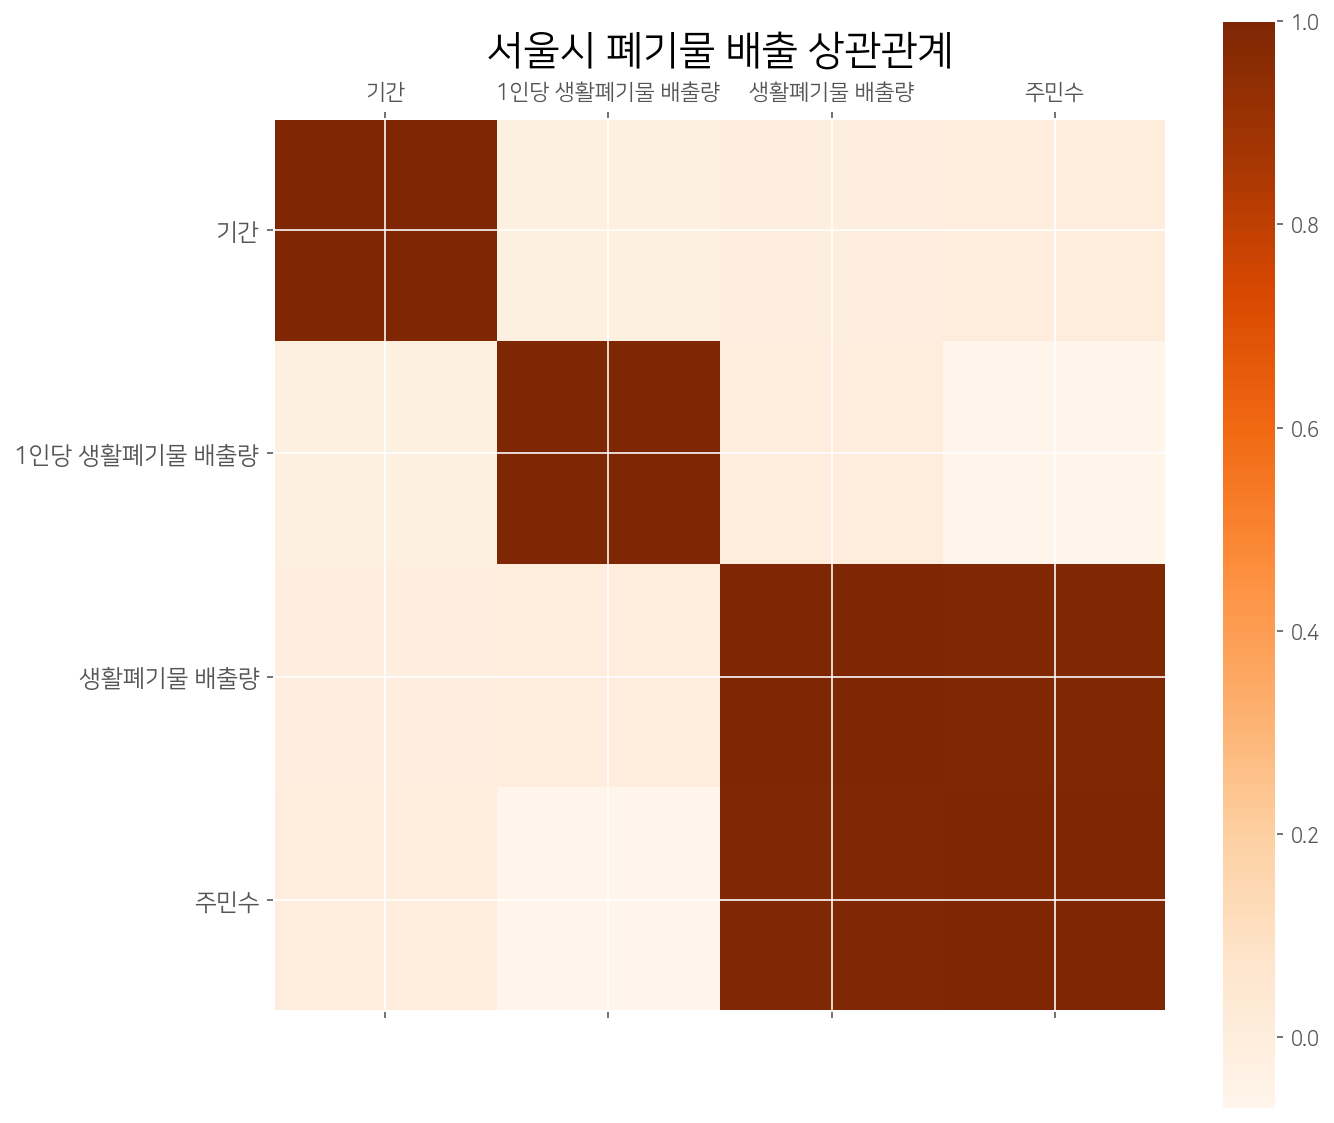

In [ ]:
#dff 상관관계를 시각화.

a = ['기간', '1인당 생활폐기물 배출량', '생활폐기물 배출량', '주민수'] #라벨 이름 


fig = plt.figure(figsize = (10,10)) #사이즈.
ax = fig.add_subplot(111)
cax = ax.matshow(dff.corr(), cmap='Oranges')
fig.colorbar(cax) #컬러바

ax.set_xticklabels(['']+a, size = 11)
ax.set_yticklabels(['']+a, size = 12)
ax.set_title('서울시 폐기물 배출 상관관계', size = 20)

plt.show()


In [ ]:
#2009년과 2018년을 단순 비교해서 생활폐기물 배출량 증감률을 확인한다.
dff

In [ ]:
s2009 = dff['기간'] == 2009
s2009
seoul2009 = dff[s2009]
seoul2009

In [ ]:
s2018 = dff['기간'] == 2018
s2018
seoul2018 = dff[s2018]
seoul2018

In [ ]:
#서울시 지역별 연령 데이터 전처리
age = pd.read_csv('age.txt', error_bad_lines=False, sep = '\t')
age = age.replace('합계', '서울특별시')
age = age.rename(columns = {'지역': '지역구'})
age = age.drop(['남자', '여자'], axis = 1)
age

,기간,지역구,전체평균연령
0,2009,서울특별시,37.5
1,2009,종로구,39.4
2,2009,중구,39.8
3,2009,용산구,39.0
4,2009,성동구,37.8
...,...,...,...
255,2018,관악구,41.7
256,2018,서초구,40.4
257,2018,강남구,40.5
258,2018,송파구,40.7


In [ ]:
#이 데이터와 기본 데이터인 dff를 merge 
merge_df = dff.merge(age)
merge_df

,기간,지역구,1인당 생활폐기물 배출량,생활폐기물 배출량,주민수,전체평균연령
0,2009,서울특별시,1.08,11336,10464051,37.5
1,2009,종로구,2.17,385,177543,39.4
2,2009,중구,3.54,487,137861,39.8
3,2009,용산구,1.30,326,251200,39.0
4,2009,성동구,0.99,312,316064,37.8
...,...,...,...,...,...,...
255,2018,관악구,0.84,436,520040,41.7
256,2018,서초구,1.29,563,438163,40.4
257,2018,강남구,1.24,677,547453,40.5
258,2018,송파구,0.91,611,673507,40.7


In [ ]:
merge_df.corr()
#상관관계 확인 평균연령과 생활폐기물 배출량의 상관관계를 찾기가 어려움

,기간,1인당 생활폐기물 배출량,생활폐기물 배출량,주민수,전체평균연령
기간,1.000000,-0.027647,-0.014719,-0.006271,0.797284
1인당 생활폐기물 배출량,-0.027647,1.000000,0.000011,-0.070664,0.247289
생활폐기물 배출량,-0.014719,0.000011,1.000000,0.994108,-0.063021
주민수,-0.006271,-0.070664,0.994108,1.000000,-0.067654
전체평균연령,0.797284,0.247289,-0.063021,-0.067654,1.000000


In [ ]:
merge_df

,기간,지역구,1인당 생활폐기물 배출량,생활폐기물 배출량,주민수,전체평균연령
0,2009,서울특별시,1.08,11336,10464051,37.5
1,2009,종로구,2.17,385,177543,39.4
2,2009,중구,3.54,487,137861,39.8
3,2009,용산구,1.30,326,251200,39.0
4,2009,성동구,0.99,312,316064,37.8
...,...,...,...,...,...,...
255,2018,관악구,0.84,436,520040,41.7
256,2018,서초구,1.29,563,438163,40.4
257,2018,강남구,1.24,677,547453,40.5
258,2018,송파구,0.91,611,673507,40.7


In [ ]:
#서울시 산업군 데이터 2009년부터 2018년 취합. 여기서 숙박 및 음심적업만 골라서 2009년부터 2018년까지 자치구별 숙박 및 음식점업의 갯수 변화를 보려한다.
a2009 = pd.read_csv('2009.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2010 = pd.read_csv('2010.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2011 = pd.read_csv('2011.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2012 = pd.read_csv('2012.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2013 = pd.read_csv('2013.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2014 = pd.read_csv('2014.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2015 = pd.read_csv('2015.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2016 = pd.read_csv('2016.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2017 = pd.read_csv('2017.txt', error_bad_lines = False, sep = '\t',thousands = ',')
a2018 = pd.read_csv('2018.txt', error_bad_lines = False, sep = '\t',thousands = ',')

In [ ]:
aa2009 = a2009[['기간', '자치구','동', '숙박 및 음식점업']]
aa2009 = aa2009.drop([0,1])
aa2009
find2009 = aa2009['동'] == '계'
f2009= aa2009[find2009]
f2009
ind2009= f2009.drop(['동'], axis = 1)
ind2009


,기간,자치구,숙박 및 음식점업
3,2009,종로구,"5,893"
22,2009,중구,"5,406"
38,2009,용산구,"3,246"
55,2009,성동구,"3,118"
73,2009,광진구,"4,437"
89,2009,동대문구,"4,989"
104,2009,중랑구,"4,177"
121,2009,성북구,"4,333"
142,2009,강북구,"3,728"
156,2009,도봉구,"2,604"


In [ ]:
aa2010 = a2010[['기간', '자치구','동', '숙박 및 음식점업']]
aa2010 = aa2010.drop([0,1])
aa2010
find2010 = aa2010['동'] == '계'
f2010= aa2010[find2010]
f2010
ind2010= f2010.drop(['동'], axis = 1)
ind2010


In [ ]:
aa2011 = a2011[['기간', '자치구','동', '숙박 및 음식점업']]
aa2011 = aa2011.drop([0,1])
aa2011
find2011 = aa2011['동'] == '소계'
f2011= aa2011[find2011]
f2011
ind2011= f2011.drop(['동'], axis = 1)
ind2011


In [ ]:
aa2012 = a2012[['기간', '자치구','동', '숙박 및 음식점업']]
aa2012 = aa2012.drop([0,1])
aa2012
find2012 = aa2012['동'] == '소계'
f2012= aa2012[find2012]
f2012
ind2012= f2012.drop(['동'], axis = 1)
ind2012


In [ ]:
a2013
aa2013 = a2013[['기간', '자치구','행정동', '숙박 및 음식점업']]
aa2013 = aa2013.drop([0,1])
aa2013
find2013 = aa2013['행정동'] == '소계'
f2013= aa2013[find2013]
f2013
ind2013= f2013.drop(['행정동'], axis = 1)
ind2013



In [ ]:
aa2014 = a2014[['기간', '자치구','행정동', '숙박 및 음식점업']]
aa2014 = aa2014.drop([0,1])
aa2014
find2014 = aa2014['행정동'] == '소계'
f2014= aa2014[find2014]
f2014
ind2014= f2014.drop(['행정동'], axis = 1)
ind2014


In [ ]:
aa2015 = a2015[['기간', '자치구','동', '숙박 및 음식점업']]
aa2015 = aa2015.drop([0,1])
aa2015
find2015 = aa2015['동'] == '소계'
f2015= aa2015[find2015]
f2015
ind2015= f2015.drop(['동'], axis = 1)
ind2015


In [ ]:
aa2016 = a2016[['기간', '자치구','동', '숙박 및 음식점업']]
aa2016 = aa2016.drop([0,1])
aa2016
find2016 = aa2016['동'] == '소계'
f2016= aa2016[find2016]
f2016
ind2016= f2016.drop(['동'], axis = 1)
ind2016


In [ ]:
aa2017 = a2017[['기간', '자치구','동', '숙박 및 음식점업']]
aa2017 = aa2017.drop([0,1])
aa2017
find2017 = aa2017['동'] == '소계'
f2017= aa2017[find2017]
f2017
ind2017= f2017.drop(['동'], axis = 1)
ind2017


In [ ]:
aa2018 = a2018[['기간', '자치구','동', '숙박 및 음식점업']]
aa2018 = aa2018.drop([0,1])
aa2018
find2018 = aa2018['동'] == '소계'
f2018= aa2018[find2018]
f2018
ind2018= f2018.drop(['동'], axis = 1)
ind2018


In [ ]:
#서울시 자치구별 식당 갯수 취합
ind_seoul = pd.concat([ind2009, ind2010, ind2011, ind2012, ind2013, ind2014, ind2015, ind2016, ind2017, ind2018])
ind_seoul

,기간,자치구,숙박 및 음식점업
3,2009,종로구,"5,893"
22,2009,중구,"5,406"
38,2009,용산구,"3,246"
55,2009,성동구,"3,118"
73,2009,광진구,"4,437"
...,...,...,...
341,2018,관악구,"5,561"
363,2018,서초구,"6,646"
382,2018,강남구,"10,730"
405,2018,송파구,"7,234"


In [ ]:
#강남구만 추리기
is_gangnam = ind_seoul['자치구'] == '강남구'
gangnam = ind_seoul[is_gangnam]
gangnam

In [ ]:
#강북구만 추리기
is_gangbuk = ind_seoul['자치구'] == '강북구'
gangbuk = ind_seoul[is_gangbuk]
gangbuk

In [ ]:
#강남구 강북구 데이터 비교하기
gnb = pd.concat([gangnam, gangbuk])
gnb
gnb['숙박 및 음식점업'] = gnb['숙박 및 음식점업'].str.replace(',', '').astype('int64')
gnb

df_gnb = pd.pivot_table(gnb, index = '자치구', columns = '기간', values = '숙박 및 음식점업')
df_gnb

기간,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
자치구,,,,,,,,,,
강남구,9057,9323,10029,10562,10498,10987,11201,10860,11074,10730
강북구,3728,3712,3798,3815,3790,3775,3667,3666,3681,3719


In [ ]:
gn1 = df_gnb.loc['강남구']
gb1 = df_gnb.loc['강북구']

Text(0, 0.5, '개수 (개)')

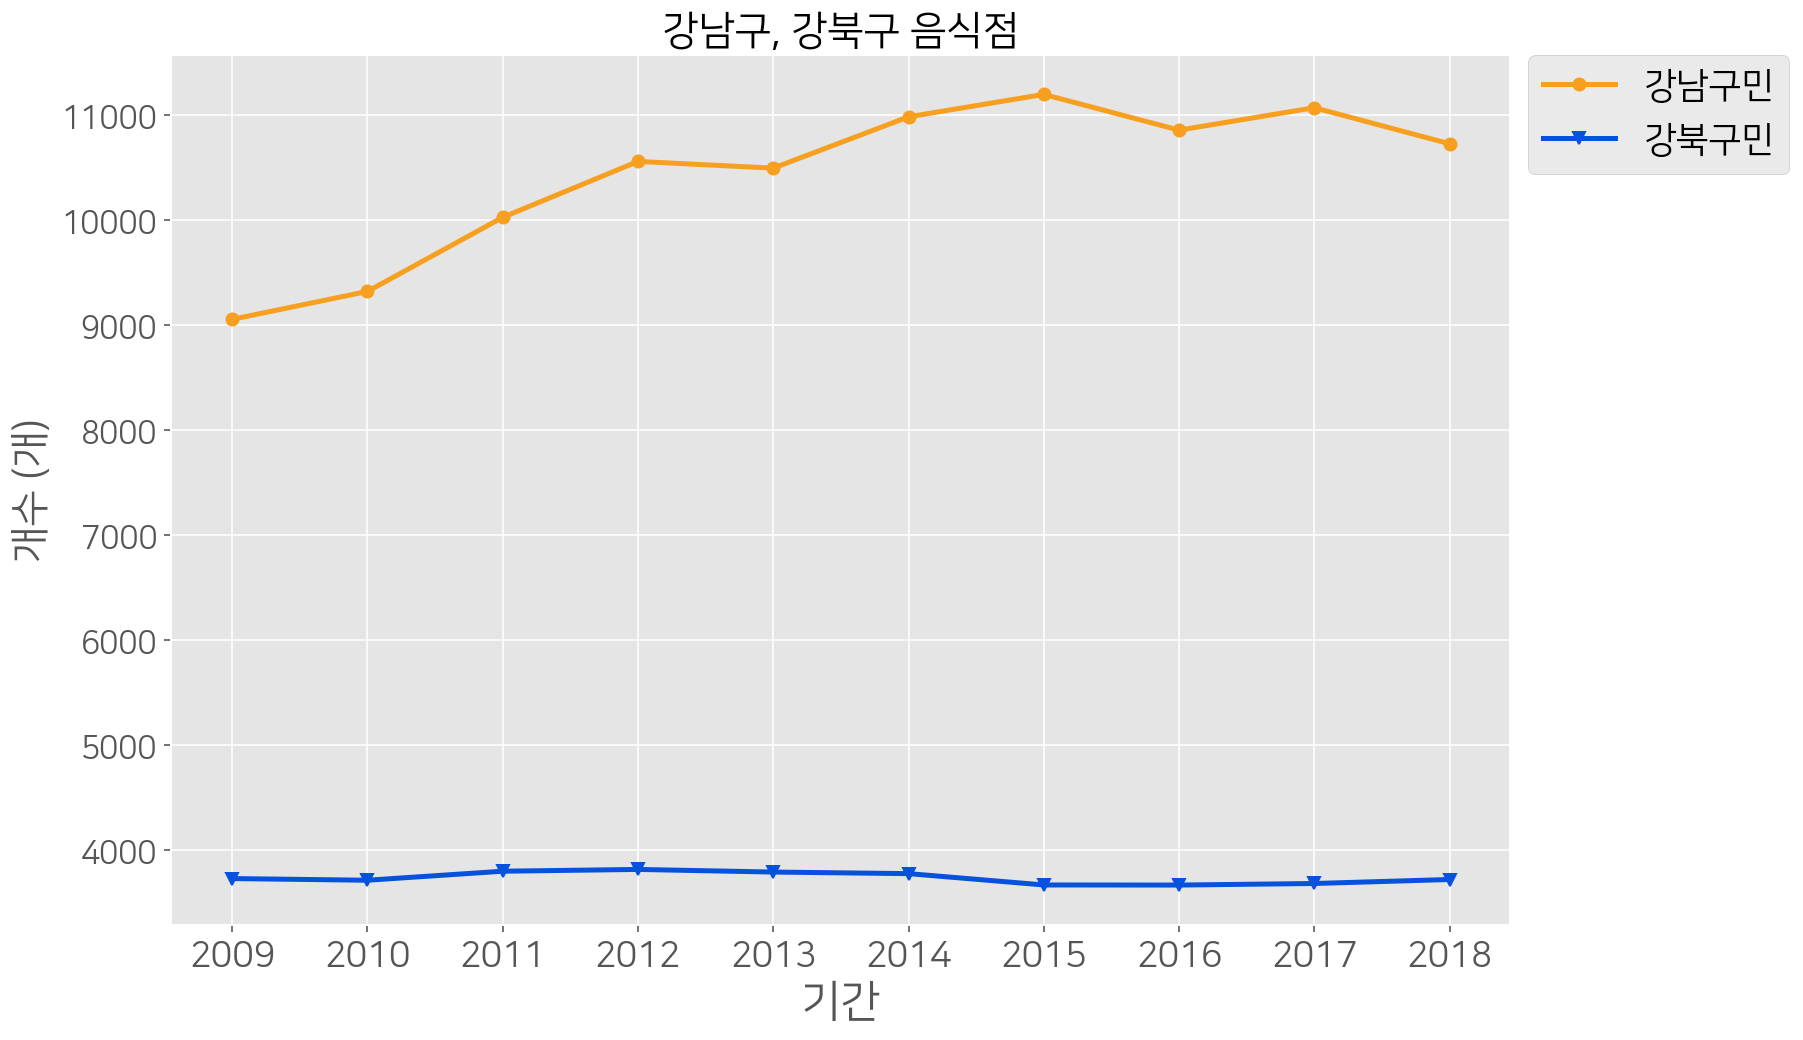

In [ ]:
fig =plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)

plt.style.use('ggplot')

plt.plot(gn1.index, gn1.values,marker= 'o', linewidth = 2.5, color = '#F79F1F', label = '강남구민')
plt.plot(gb1.index, gb1.values,marker= 'v', linewidth = 2.5, color = '#0652DD', label = '강북구민')




ax.legend(bbox_to_anchor=(1, 1.02))
# plt.rc('legend', fontsize=18)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 16)

ax.set_title('강남구, 강북구 음식점 개수 변화', size =20)
ax.set_xlabel('기간', size = 22)
ax.set_ylabel('개수 (개)', size = 20)

In [ ]:
#음식물 쓰레기 배출량 데이터
fd = pd.read_csv('food_waste.txt', error_bad_lines=False, sep = '\t', thousands = ',', skiprows = 2)

In [ ]:
fd = fd.replace('-', 0)
fd.columns
fd
fd = fd.rename(columns = {'자치구':'지역구', '발생량' :'음식물 쓰레기량'})
fd


In [ ]:
#음식물 쓰레기 데이터와 위에 merge했던 데이터를 다시 merge 
wf = merge_df.merge(fd)
seoul = wf.merge(seoul_r)
seoul
seoul_cor = seoul[['기간', '지역구', '1인당 생활폐기물 배출량', '생활폐기물 배출량','음식점', '음식물 쓰레기량','주민수', '전체평균연령']]
seoul_cor

,기간,지역구,1인당 생활폐기물 배출량,생활폐기물 배출량,음식점,음식물 쓰레기량,주민수,전체평균연령
0,2009,종로구,2.17,385,7427,121.4,177543,39.4
1,2009,중구,3.54,487,7314,143.3,137861,39.8
2,2009,용산구,1.30,326,3708,93.4,251200,39.0
3,2009,성동구,0.99,312,3116,85.1,316064,37.8
4,2009,광진구,0.99,382,4461,99.5,386513,36.8
...,...,...,...,...,...,...,...,...
245,2018,관악구,0.84,436,6035,110.3,520040,41.7
246,2018,서초구,1.29,563,8784,175.7,438163,40.4
247,2018,강남구,1.24,677,15337,269.5,547453,40.5
248,2018,송파구,0.91,611,9246,217.7,673507,40.7


In [ ]:
seoul_cor.dtypes

기간                 int64
지역구               object
1인당 생활폐기물 배출량    float64
생활폐기물 배출량          int64
음식점                int64
음식물 쓰레기량         float64
주민수                int64
전체평균연령           float64
dtype: object

In [ ]:
seoul_cor.corr()

,기간,1인당 생활폐기물 배출량,생활폐기물 배출량,음식점,음식물 쓰레기량,주민수,전체평균연령
기간,1.000000,-0.027014,-0.093883,0.128266,-0.136880,-0.048611,0.791987
1인당 생활폐기물 배출량,-0.027014,1.000000,0.406832,0.417176,0.177189,-0.557419,0.250642
생활폐기물 배출량,-0.093883,0.406832,1.000000,0.766663,0.883331,0.396247,-0.324999
음식점,0.128266,0.417176,0.766663,1.000000,0.764704,0.192878,-0.061896
음식물 쓰레기량,-0.136880,0.177189,0.883331,0.764704,1.000000,0.569557,-0.444819
주민수,-0.048611,-0.557419,0.396247,0.192878,0.569557,1.000000,-0.521933
전체평균연령,0.791987,0.250642,-0.324999,-0.061896,-0.444819,-0.521933,1.000000


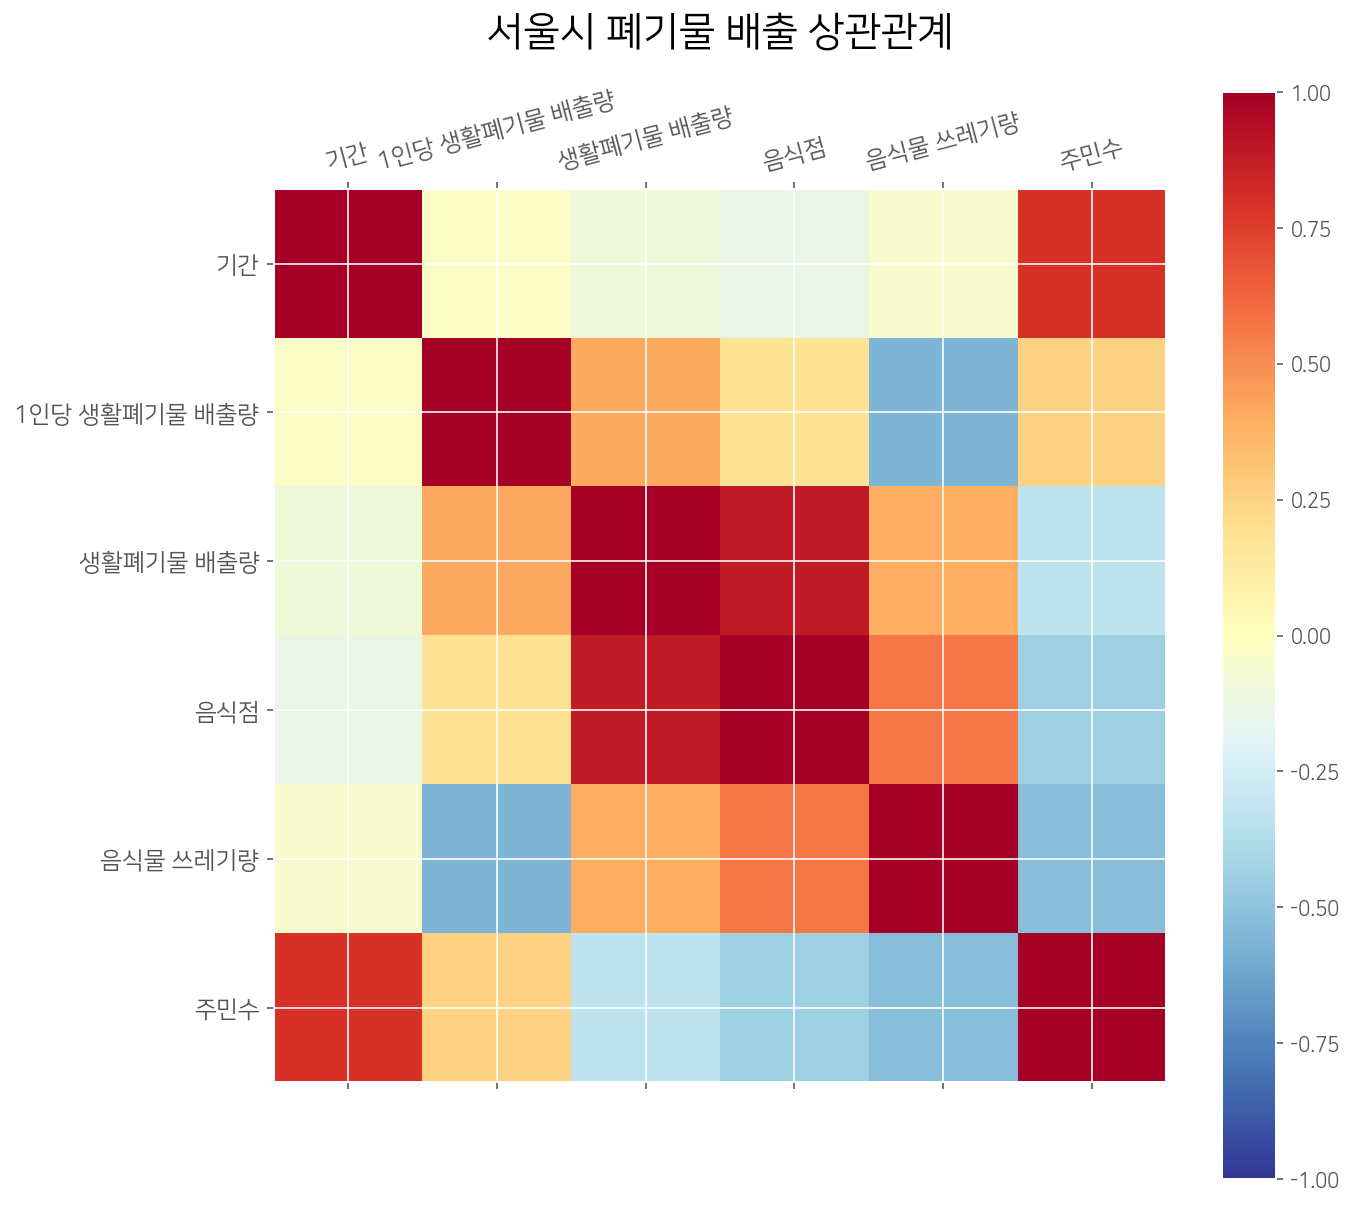

In [ ]:
c = ['기간', '1인당 생활폐기물 배출량', '생활폐기물 배출량', '음식점', '음식물 쓰레기량','주민수', '전체평균연령'] #라벨 이름 


fig = plt.figure(figsize = (10,10)) #사이즈.
ax = fig.add_subplot(111)
cax = ax.matshow(wff.corr(),cmap = 'RdYlBu_r', vmin=-1, vmax=1)
fig.colorbar(cax) #컬러바

ax.set_xticklabels(['']+c, rotation = 15, size = 12)
ax.set_yticklabels(['']+c, size = 12)
ax.set_title('서울시 폐기물 배출 상관관계', position = (0.5, 1.15), size = 20)

plt.show()

In [1]:
hhh = seoul_cor.merge(hh)

hhh.dtypes

NameError: ignored

In [ ]:
hhh
hhhh = hhh[['1인당 생활폐기물 배출량', '생활폐기물 배출량', '1인', '일반가구수']]
hhhh = hhhh.rename(columns = {'1인':'1인가구수'})
hhhh
hhhh['1인가구 비율'] = hhhh['1인가구수']/hhhh['일반가구수']

hhhh.corr()

,1인당 생활폐기물 배출량,생활폐기물 배출량,1인가구수,일반가구수,1인가구 비율
1인당 생활폐기물 배출량,1.000000,0.362551,-0.377276,-0.567702,0.327412
생활폐기물 배출량,0.362551,1.000000,0.239427,0.402582,-0.104305
1인가구수,-0.377276,0.239427,1.000000,0.773364,0.420491
일반가구수,-0.567702,0.402582,0.773364,1.000000,-0.222128
1인가구 비율,0.327412,-0.104305,0.420491,-0.222128,1.000000


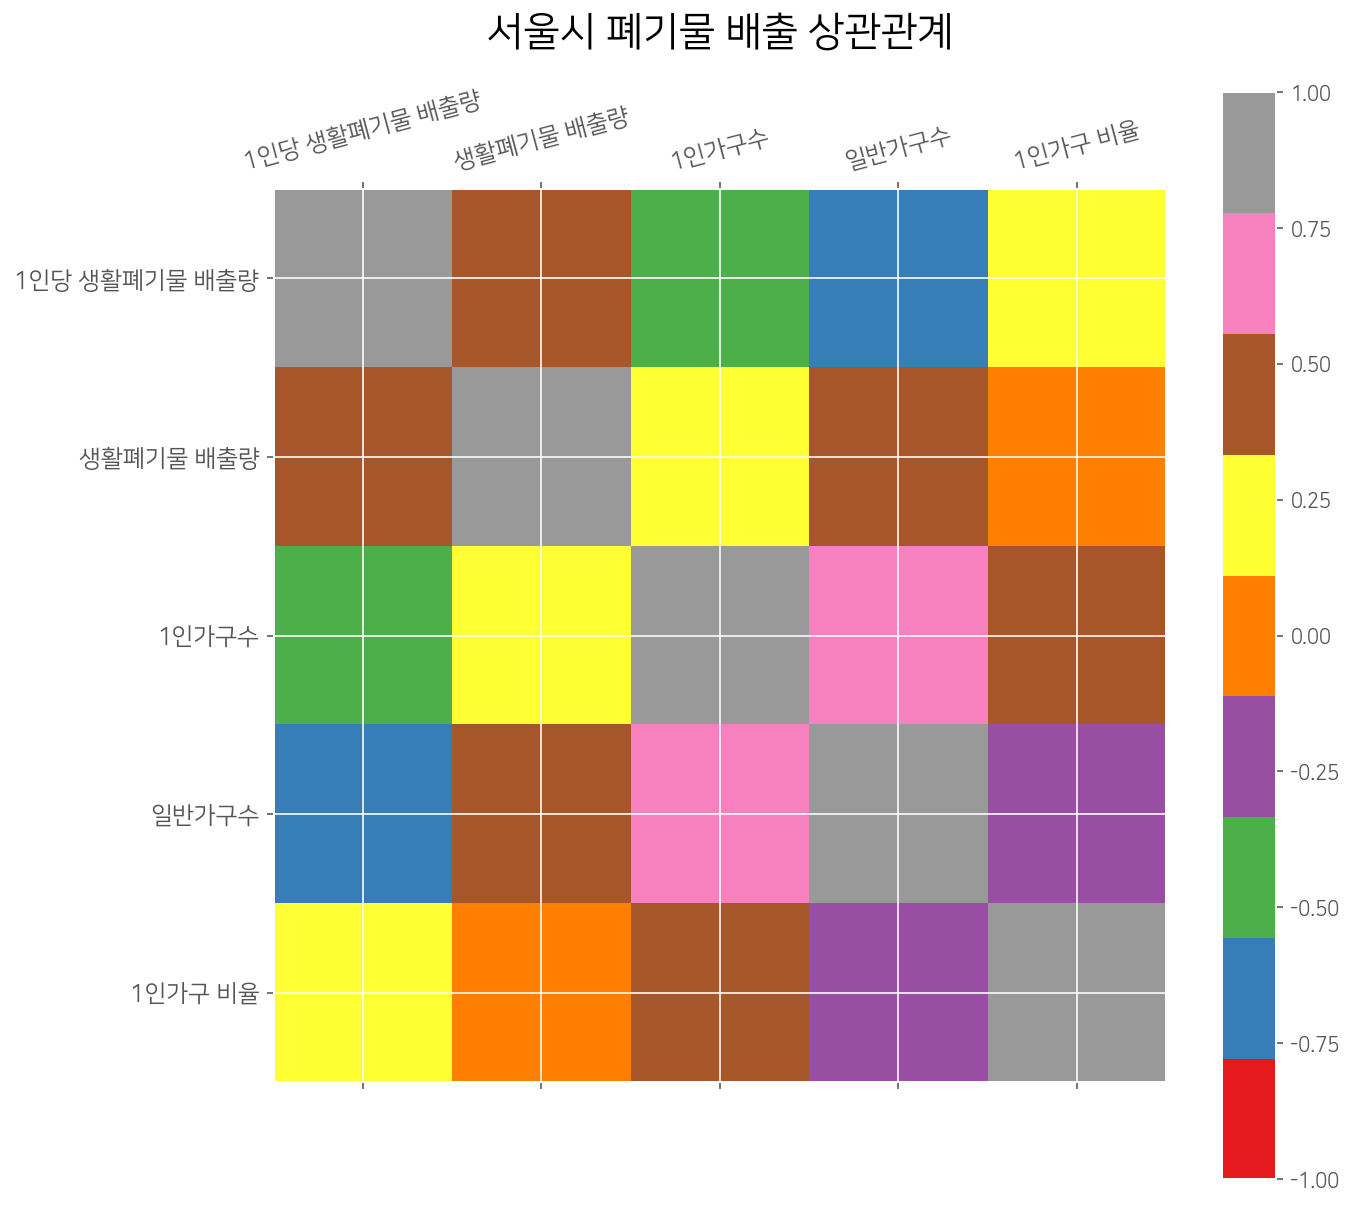

In [ ]:
d = ['1인당 생활폐기물 배출량', '생활폐기물 배출량', '1인가구수', '일반가구수', '1인가구 비율'] #라벨 이름 


fig = plt.figure(figsize = (10,10)) #사이즈.
ax = fig.add_subplot(111)
cax = ax.matshow(hhhh.corr(), cmap='Set1', vmin=-1, vmax=1)
fig.colorbar(cax) #컬러바

ax.set_xticklabels(['']+d, rotation = 15, size = 12)
ax.set_yticklabels(['']+d, size = 12)
ax.set_title('서울시 폐기물 배출 상관관계', position = (0.5, 1.15), size = 20)

plt.show()

In [ ]:
seoul_res = pd.read_csv('seoul_res.txt', error_bad_lines = False, sep = '\t',thousands = ',', skiprows = 1)

In [ ]:
seoul_r = seoul_res[['기간','자치구','소계']]
seoul_r = seoul_r.replace('계','서울특별시')
seoul_r = seoul_r.rename(columns = {'자치구':'지역구', '소계':'음식점'})
seoul_r

,기간,지역구,음식점
0,2009,서울특별시,137956
1,2009,종로구,7427
2,2009,중구,7314
3,2009,용산구,3708
4,2009,성동구,3116
...,...,...,...
255,2018,관악구,6035
256,2018,서초구,8784
257,2018,강남구,15337
258,2018,송파구,9246


In [ ]:
seoul11 = seoul_r['지역구'] == '서울특별시'
seoul22 = seoul_r[seoul11]
seoul22

In [ ]:
df_seoul = pd.pivot_table(seoul22, index = '지역구', columns = '기간', values = '음식점')
df_seoul

기간,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
지역구,,,,,,,,,,
서울특별시,137956,141522,143358,144341,145613,151588,153771,156447,161123,162187


In [ ]:
ss = df_seoul.loc['서울특별시']

Text(0, 0.5, '일평균 배출량 (kg)')

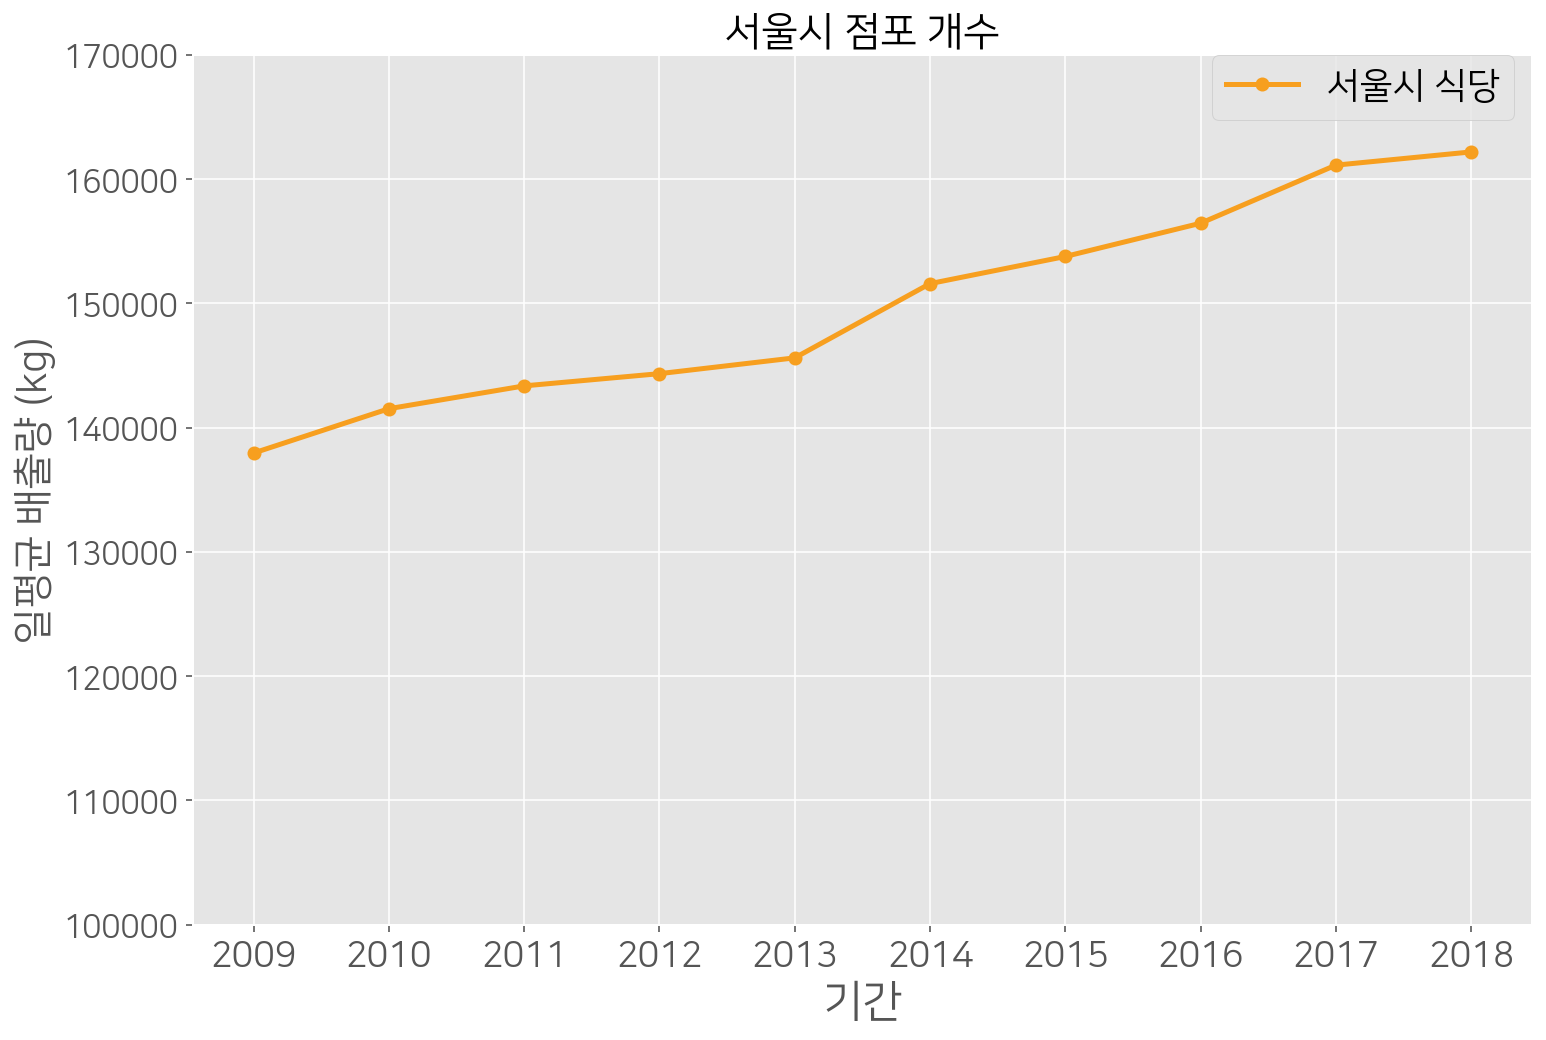

In [ ]:
fig =plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)

plt.ylim(100000, 170000)
plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],fontsize = 16)

plt.style.use('ggplot')
plt.plot(ss.index, ss.values,marker= 'o', linewidth = 2.5, color = '#F79F1F', label = '서울시 식당')



ax.legend(bbox_to_anchor=(1, 1.02))
plt.rc('legend', fontsize=18)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 16)

plt.axhline(y=1, color='black',linestyle=':', linewidth=2)

ax.set_title('서울시 점포 개수', size =20)
ax.set_xlabel('기간', size = 22)
ax.set_ylabel('일평균 배출량 (kg)', size = 20)

In [ ]:
#음식점 개수와 서울시 생활 폐기물 상관관계 
seoul_cor

,기간,지역구,1인당 생활폐기물 배출량,생활폐기물 배출량,음식점,음식물 쓰레기량,주민수,전체평균연령
0,2009,종로구,2.17,385,7427,121.4,177543,39.4
1,2009,중구,3.54,487,7314,143.3,137861,39.8
2,2009,용산구,1.30,326,3708,93.4,251200,39.0
3,2009,성동구,0.99,312,3116,85.1,316064,37.8
4,2009,광진구,0.99,382,4461,99.5,386513,36.8
...,...,...,...,...,...,...,...,...
245,2018,관악구,0.84,436,6035,110.3,520040,41.7
246,2018,서초구,1.29,563,8784,175.7,438163,40.4
247,2018,강남구,1.24,677,15337,269.5,547453,40.5
248,2018,송파구,0.91,611,9246,217.7,673507,40.7


In [ ]:
#폐기물 재활용 데이터에서 강남구만 취합
gn = fd['자치구'] == '강남구'
gn_food = fd[gn]
gn_food


In [ ]:
#폐기물 재활용 데이터에서 강남구만 취합
gb = fd['자치구'] == '강북구'
gb_food = fd[gb]
gb_food

,기간,자치구,발생량,계,사료화,퇴비화,기타,하수병합,소각,매립
9,2009,강북구,89.7,89.7,62.5,26.2,1,0,0,0
35,2010,강북구,88.5,88.5,72.5,10.5,5.5,0,0,0
61,2011,강북구,88.3,88.3,68.4,19.9,0,0,0,0
87,2012,강북구,89.7,89.7,89.2,0.4,0.1,0,0,0
113,2013,강북구,87.7,87.7,87.6,0,0.1,0,0,0
139,2014,강북구,87.7,87.7,87.6,0.1,0,0,0,0
165,2015,강북구,88.6,88.6,88,0.6,0,0,0,0
191,2016,강북구,84.5,84.5,27.2,57.3,0,0,0,0
217,2017,강북구,78.7,78.7,8,70.7,0,0,0,0
243,2018,강북구,75.9,75.9,7.9,62.5,5.5,0,0,0


In [ ]:
#2010, 2015, 2016, 2017, 2018, 2019 연도 1인가구 데이터 전처리 
household = pd.read_csv('household.txt', error_bad_lines=False, sep = '\t', thousands = ',', skiprows= 1)
household = household.rename(columns = {'구분': '지역구'})
household = household.replace('합계', '서울특별시')
household

,기간,지역구,일반가구수,1인,2인,3인,4인,5인,6인,7인 이상,평균가구원수
0,2010,서울특별시,3504297,854606,781527,788115,807836,209061,47659,15493,2.7
1,2010,종로구,57807,18156,13073,11255,10832,3315,849,327,2.5
2,2010,중구,45656,13909,10957,9357,8229,2426,580,198,2.5
3,2010,용산구,86470,25846,21376,17988,15721,4280,958,301,2.5
4,2010,성동구,107114,27041,25050,23471,23512,6070,1456,514,2.7
...,...,...,...,...,...,...,...,...,...,...,...
151,2019,관악구,242154,119863,55423,34875,24563,5806,1283,341,2.0
152,2019,서초구,155377,42667,38892,35327,29850,6704,1503,434,2.5
153,2019,강남구,206524,66073,51560,43435,35800,7671,1564,421,2.4
154,2019,송파구,252212,68861,65402,57821,47607,10014,2038,469,2.5


In [ ]:
hh = household[['기간','지역구','일반가구수', '1인','평균가구원수']]
hh


,기간,지역구,일반가구수,1인,평균가구원수
0,2010,서울특별시,3504297,854606,2.7
1,2010,종로구,57807,18156,2.5
2,2010,중구,45656,13909,2.5
3,2010,용산구,86470,25846,2.5
4,2010,성동구,107114,27041,2.7
...,...,...,...,...,...
151,2019,관악구,242154,119863,2.0
152,2019,서초구,155377,42667,2.5
153,2019,강남구,206524,66073,2.4
154,2019,송파구,252212,68861,2.5


In [ ]:
#df1 : 서울특별시와 지역구의 연도별 1인당 생활폐기물 배출량 변화를 볼 수 있다.
#df2 : 연도별 지역구 주민수 변화를 볼 수 있다.
#df3 : 연도별 지역구 생활폐기물 배출량 변화를 볼 수 있다.

df1 = pd.pivot_table(df, index = '지역구', columns = '기간', values = '1인당 생활폐기물 배출량')
df2 = pd.pivot_table(df, index = '지역구', columns = '기간', values = '주민수')
df3 = pd.pivot_table(df, index = '지역구', columns = '기간', values = '생활폐기물 배출량')

df1 = df1.reindex(index = ['서울특별시', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'])
df2 = df2.reindex(index = ['서울특별시', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'])
df3 = df3.reindex(index = ['서울특별시', '강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구',
       '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구',
       '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'])

In [ ]:
df1

In [ ]:
df2

In [ ]:
df3

기간,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
지역구,,,,,,,,,,
서울특별시,11336,10020,9440,9189,8559,9613,9438,9608,9217,9492
강남구,978,990,1017,984,745,808,713,707,708,677
강동구,426,258,262,258,246,392,412,500,375,370
강북구,315,233,242,242,232,232,230,230,224,230
강서구,570,671,429,399,370,436,434,425,463,480
관악구,474,340,321,317,315,354,337,339,361,436
광진구,382,392,365,368,379,348,339,326,319,342
구로구,430,308,276,285,278,322,314,318,310,319
금천구,272,196,221,223,180,250,240,239,241,248


In [ ]:
df3.nlargest(4, [2018])

기간,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
지역구,,,,,,,,,,
서울특별시,11336,10020,9440,9189,8559,9613,9438,9608,9217,9492
강남구,978,990,1017,984,745,808,713,707,708,677
송파구,791,733,751,644,599,555,575,569,550,611
서초구,608,589,588,578,552,546,562,570,571,563


In [ ]:
df3.nsmallest(4,[2018])

기간,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
지역구,,,,,,,,,,
강북구,315,233,242,242,232,232,230,230,224,230
금천구,272,196,221,223,180,250,240,239,241,248
도봉구,307,400,404,400,386,348,314,315,243,255
성동구,312,282,290,267,261,254,259,257,255,270


In [ ]:
df33 = df3.drop(['서울특별시'])
df33[평균] = 

기간,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
지역구,,,,,,,,,,
강남구,978,990,1017,984,745,808,713,707,708,677
강동구,426,258,262,258,246,392,412,500,375,370
강북구,315,233,242,242,232,232,230,230,224,230
강서구,570,671,429,399,370,436,434,425,463,480
관악구,474,340,321,317,315,354,337,339,361,436
광진구,382,392,365,368,379,348,339,326,319,342
구로구,430,308,276,285,278,322,314,318,310,319
금천구,272,196,221,223,180,250,240,239,241,248
노원구,541,452,303,307,302,356,464,455,416,467


In [ ]:
df1[2009].sort_values()
#2009년 최저 은평구, 최고 중구

df1[2010].sort_values()
#2010년 최저 중랑구, 최고 중구

df1[2011].sort_values()
#2011년 최저 중랑구, 최고 중구

df1[2012].sort_values()
#2012년 최저 노원구, 최고 중구

df1[2013].sort_values()
#2013년 최저 강동구, 최고  중구

df1[2014].sort_values()
#2014년 최저 은평구, 최고 중구

df1[2015].sort_values()
#2015년 최저 은평구, 최고 중구

df1[2016].sort_values()
#2016년 최저 은평구, 최고 중구

df1[2017].sort_values()
#2017년 최저 양천구, 최고 중구

df1[2018].sort_values()
#2018년 최저 양천구, 최고 중구

#최저 : 은평, 중랑, 노원, 강동, 양천
#최고 : 중구, 종로구
#분명 이 방법 보다 편한 방법이 있으리라.

In [ ]:
#2018년 데이터 최고와 최저를 기준
seoul1 = df1.loc['서울특별시']
dongdae1 = df1.loc['동대문구']
joong1 = df1.loc['중구']
jongro1 = df1.loc['종로구']
gang1 = df1.loc['강동구']
yang1 = df1.loc['양천구']
gangnam1 = df1.loc['강남구']
gangbuk1 = df1.loc['강북구']

Text(0, 0.5, '일평균 배출량 (kg)')

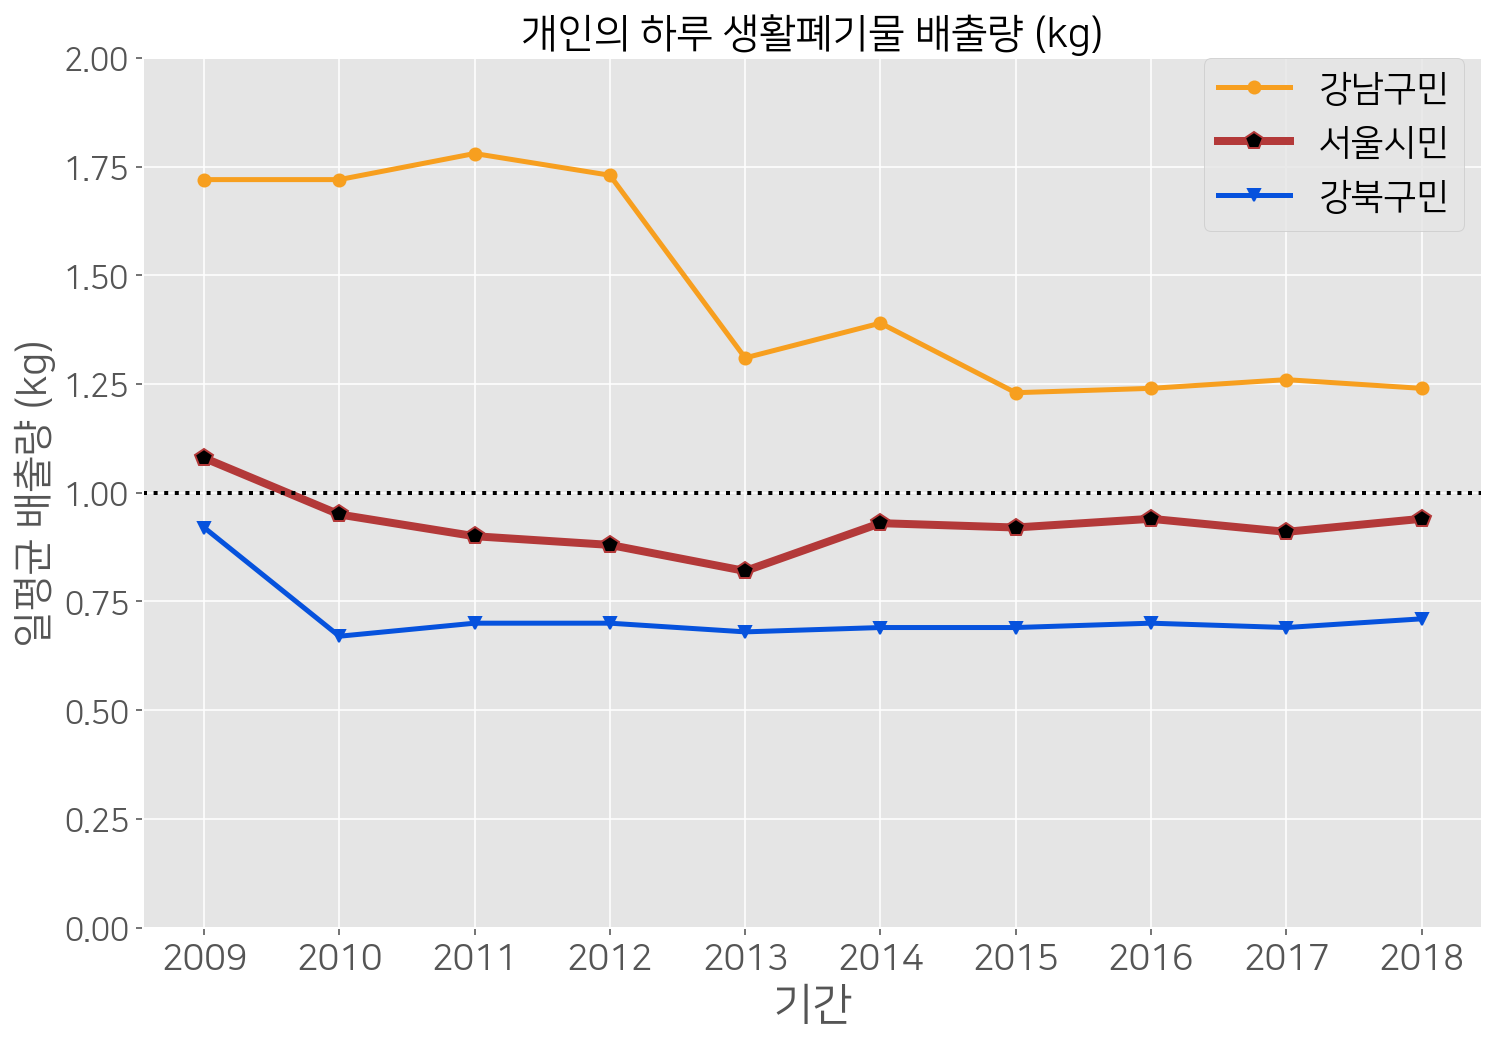

In [ ]:
#서울시와 자치구 1인 일평균 생활폐기물 배출량을 시각화한다. 너무 많은 데이터는 가독성이 떨어져 상위 2개, 하위 2개와 서울시를 넣었다.

fig =plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)


plt.ylim(0, 2)
plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],fontsize = 16)

plt.style.use('ggplot')
plt.plot(gangnam1.index, gangnam1.values,marker= 'o', linewidth = 2.5, color = '#F79F1F', label = '강남구민')
plt.plot(seoul1.index, seoul1.values,marker= 'p',markerfacecolor='black',markersize=9, color = '#b33939', linewidth = 4, label = '서울시민')
plt.plot(gangbuk1.index, gangbuk1.values,marker= 'v', linewidth = 2.5, color = '#0652DD', label = '강북구민')




ax.legend(bbox_to_anchor=(1, 1.02))
plt.rc('legend', fontsize=18)

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 16)

plt.axhline(y=1, color='black',linestyle=':', linewidth=2)

ax.set_title('개인의 하루 생활폐기물 배출량 (kg)', size =20)
ax.set_xlabel('기간', size = 22)
ax.set_ylabel('일평균 배출량 (kg)', size = 20)

Text(0, 0.5, '일평균 배출량 (kg)')

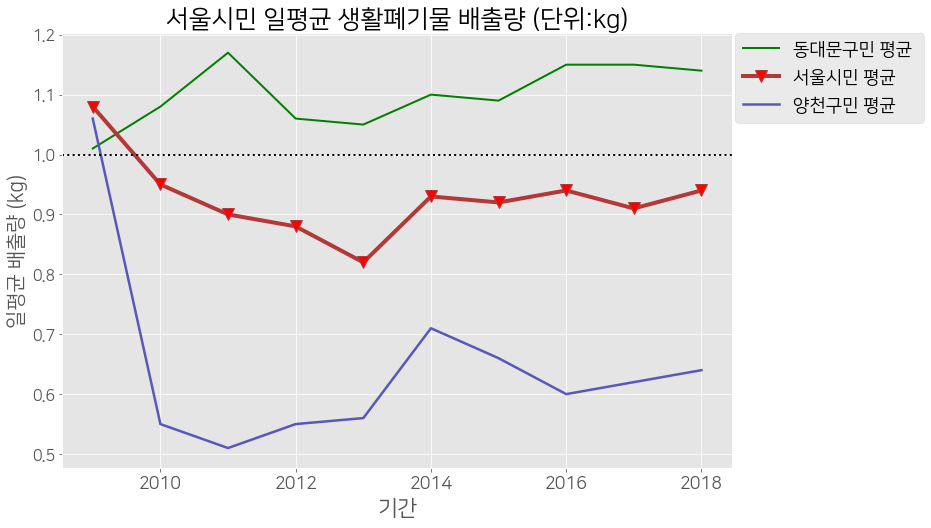

In [ ]:
fig =plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)
plt.style.use('ggplot')

plt.plot(dongdae1.index, dongdae1.values,linewidth = 2, color = 'green', label = '동대문구민 평균 ')
plt.plot(seoul1.index, seoul1.values,marker= 'v',markerfacecolor='red',markersize=12, color = '#b33939', linewidth = 4, label = '서울시민 평균')
plt.plot(yang1.index, yang1.values, linewidth = 2.5, color = '#5758BB', label = '양천구민 평균')

ax.legend(bbox_to_anchor=(1.3, 1.02))

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 16)

plt.axhline(y=1, color='black',linestyle=':', linewidth=2)

ax.set_title('서울시민 일평균 생활폐기물 배출량 (단위:kg)', size =25)
ax.set_xlabel('기간', size = 22)
ax.set_ylabel('일평균 배출량 (kg)', size = 20)

In [ ]:
seoul2 = df2.loc['서울특별시']
dongdae2 = df2.loc['동대문구']
joong2 = df2.loc['중구']
jongro2 = df2.loc['종로구']
gang2 = df2.loc['강동구']
yang2 = df2.loc['양천구']
gangnam2 = df2.loc['강남구']
gangbuk2 = df2.loc['강북구']

In [ ]:
dongdae2

기간
2009    374277
2010    379343
2011    378534
2012    375683
2013    376445
2014    376319
2015    373824
2016    370312
2017    366011
2018    364338
Name: 동대문구, dtype: int64

Text(0, 0.5, '구민수(명)')

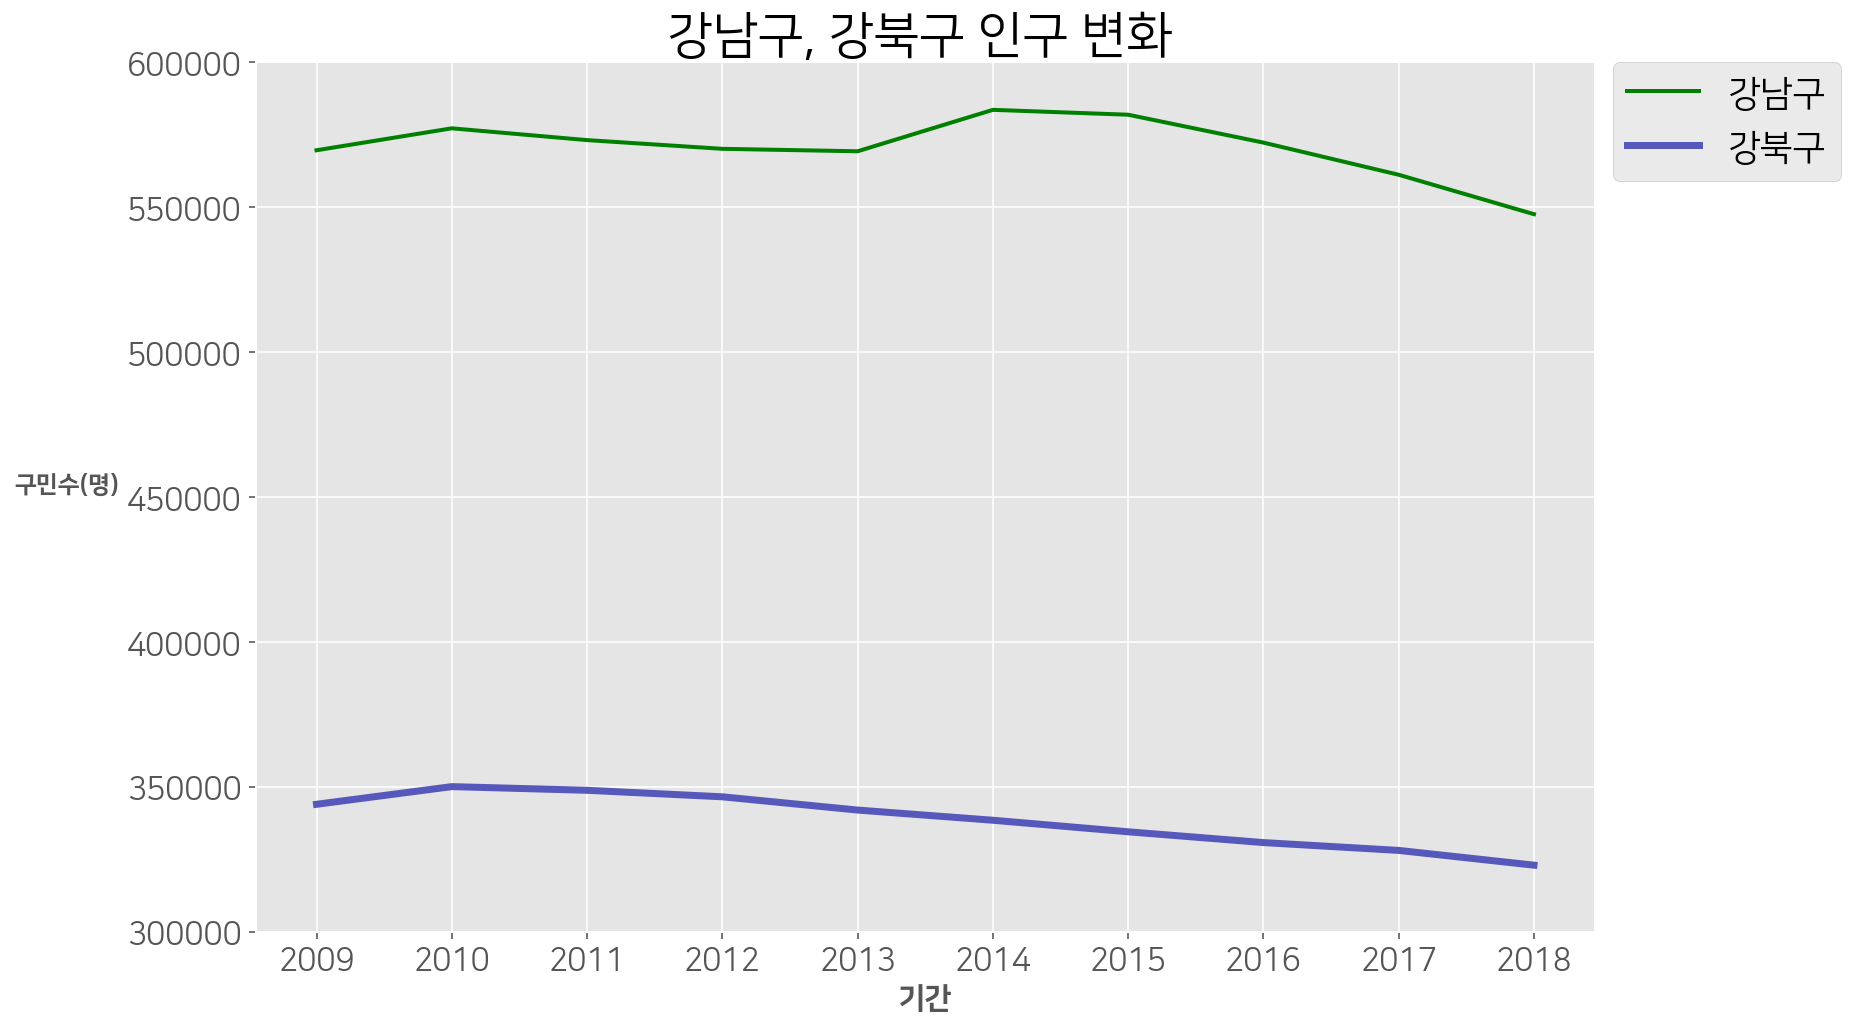

In [ ]:
fig =plt.figure(figsize = (12,8))
ax = fig.add_subplot(111)

plt.ylim(300000, 600000)
plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],fontsize = 16)
plt.style.use('ggplot')

plt.plot(gangnam2.index, gangnam2.values,linewidth = 2,color = 'green', label = '강남구')
plt.plot(gangbuk2.index, gangbuk2.values,linewidth = 3.5,color = '#5758BB', label = '강북구')

ax.legend(loc = 'higher left', bbox_to_anchor=(1, 1.02))
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.set_title('강남구, 강북구 인구 변화 ', size =25)
ax.set_xlabel('기간',fontweight='bold', size = 15)
ax.set_ylabel('구민수(명)',fontweight='bold', size = 12,rotation=0, labelpad= 30)

In [ ]:
df3

기간,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
지역구,,,,,,,,,,
서울특별시,11336,10020,9440,9189,8559,9613,9438,9608,9217,9492
강남구,978,990,1017,984,745,808,713,707,708,677
강동구,426,258,262,258,246,392,412,500,375,370
강북구,315,233,242,242,232,232,230,230,224,230
강서구,570,671,429,399,370,436,434,425,463,480
관악구,474,340,321,317,315,354,337,339,361,436
광진구,382,392,365,368,379,348,339,326,319,342
구로구,430,308,276,285,278,322,314,318,310,319
금천구,272,196,221,223,180,250,240,239,241,248


In [ ]:
seoul3 = df3.loc['서울특별시']
dd3 = df3.loc['동대문구']
j3 = df3.loc['중구']
jr3 = df3.loc['종로구']
gd3 = df3.loc['강동구']
yc3 = df3.loc['양천구']
gangnam3 = df3.loc['강남구']
gangbuk3 = df3.loc['강북구']
sp3 = df3.loc['송파구']
ys3 = df3.loc['용산구']
ep3 = df3.loc['은평구']
jl3 = df3.loc['중랑구']
gd3 = df3.loc['강동구']
gs3 = df3.loc['강서구']
gw3 = df3.loc['관악구']
gj3 = df3.loc['광진구']
gr3 = df3.loc['구로구']

In [ ]:
seoul3

기간
2009    11336
2010    10020
2011     9440
2012     9189
2013     8559
2014     9613
2015     9438
2016     9608
2017     9217
2018     9492
Name: 서울특별시, dtype: int64

Text(0, 0.5, '평균 배출량 (단위:톤)')

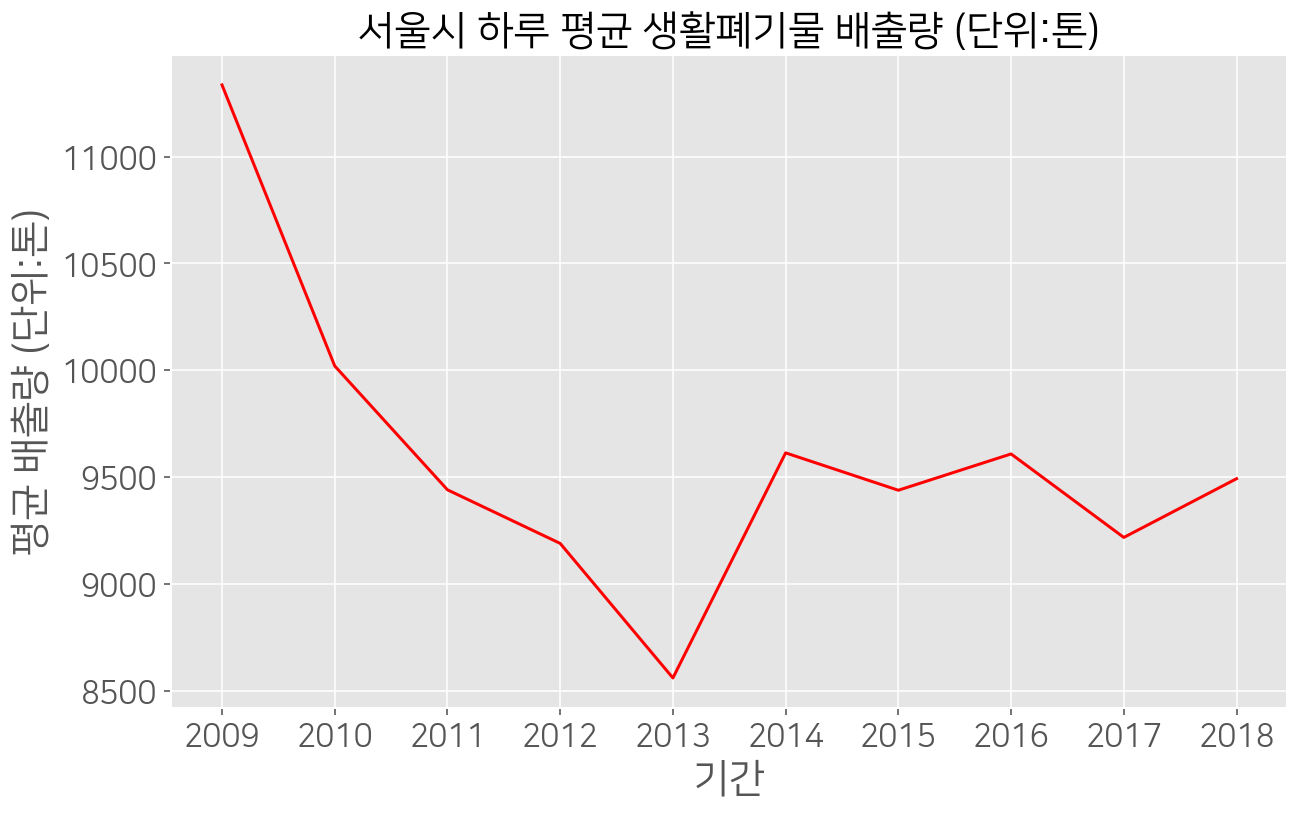

In [ ]:
fig =plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)

plt.plot(seoul3.index, seoul3.values, color = 'red')

plt.style.use('ggplot')

plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],fontsize = 16)
plt.yticks(fontsize = 16)

ax.set_title('서울시 하루 평균 생활폐기물 배출량 (단위:톤)', size =20)
ax.set_xlabel('기간', size = 20)
ax.set_ylabel('평균 배출량 (단위:톤)', size = 20)

Text(0, 0.5, '평균 배출량 (단위:톤)')

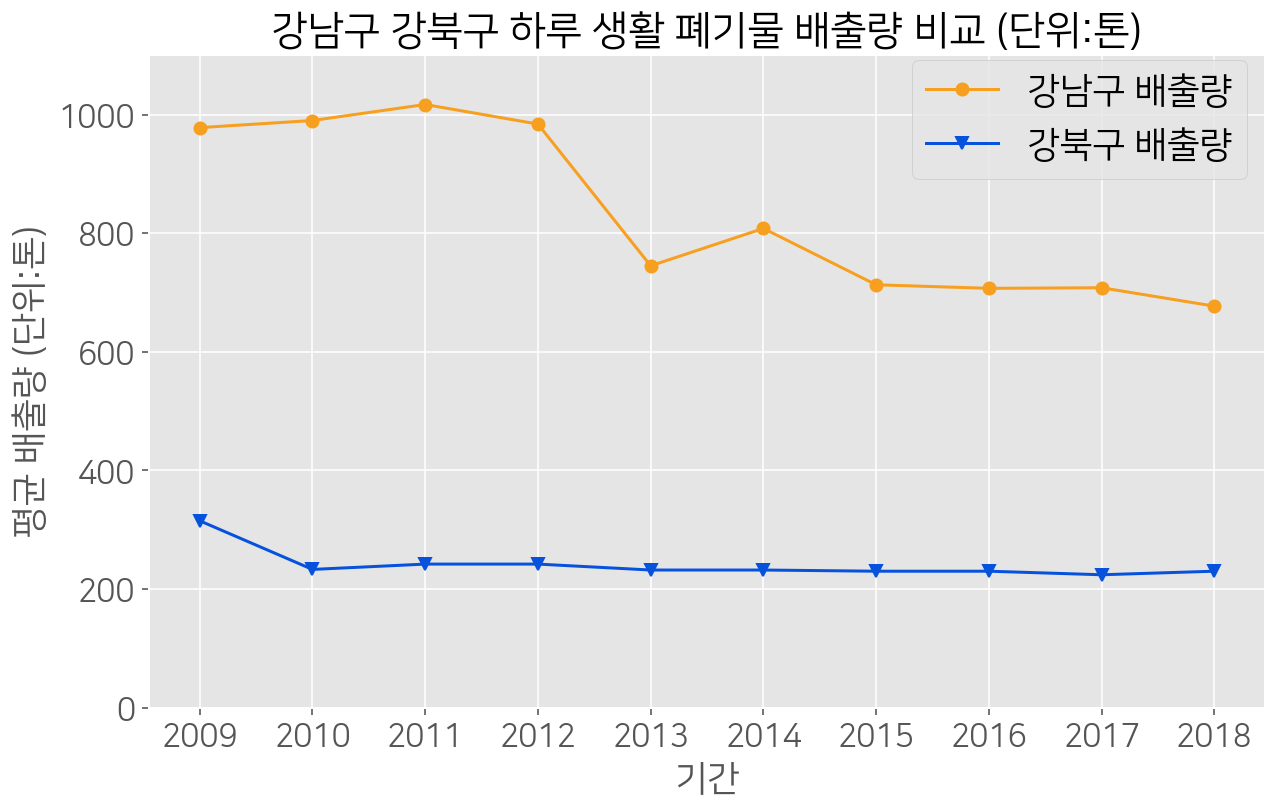

In [ ]:
fig =plt.figure(figsize = (10,6))
ax = fig.add_subplot(1,1,1)
plt.style.use('ggplot')


plt.ylim(0, 1100)
plt.plot(gangnam3.index, gangnam3.values, marker = 'o', color = '#F79F1F', label = '강남구 배출량')
plt.plot(gangbuk3.index, gangbuk3.values, marker = 'v', color = '#0652DD', label = '강북구 배출량')



ax.legend(loc = 'higher left', bbox_to_anchor=(1, 1.02))

# plt.annotate('강남구 생활폐기물 배출량',
#               xy = (1, 1),
#               rotation = 10, 
#               va ='baseline',
#               ha ='center',
#               fontsize = 5)


plt.xticks([2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018],fontsize = 16)
plt.yticks(fontsize = 16)

ax.set_title('강남구 강북구 하루 생활 폐기물 배출량 비교 (단위:톤)', size =20)
ax.set_xlabel('기간', size = 18)
ax.set_ylabel('평균 배출량 (단위:톤)', size = 18)



In [ ]:
final_merge

,기간,지역구,1인당 생활폐기물 배출량,생활폐기물 배출량,주민수,전체평균연령,총가입사업장
0,2009,서울특별시,1.08,11336,10464051,37.5,267675
1,2009,종로구,2.17,385,177543,39.4,14416
2,2009,중구,3.54,487,137861,39.8,18856
3,2009,용산구,1.30,326,251200,39.0,8473
4,2009,성동구,0.99,312,316064,37.8,8219
...,...,...,...,...,...,...,...
255,2018,관악구,0.84,436,520040,41.7,10053
256,2018,서초구,1.29,563,438163,40.4,35702
257,2018,강남구,1.24,677,547453,40.5,62098
258,2018,송파구,0.91,611,673507,40.7,29715


In [ ]:
yangcheon = final_merge['지역구'] == '양천구'
yy = final_merge[yangcheon]
yy


,기간,지역구,1인당 생활폐기물 배출량,생활폐기물 배출량,주민수,전체평균연령,총가입사업장
15,2009,양천구,1.06,534,506684,36.3,6433
41,2010,양천구,0.55,277,505223,36.9,6680
67,2011,양천구,0.51,257,505605,37.4,6934
93,2012,양천구,0.55,274,500533,37.9,7426
119,2013,양천구,0.56,276,496934,38.4,7891
145,2014,양천구,0.71,347,490708,39.0,8222
171,2015,양천구,0.66,322,489010,39.4,9142
197,2016,양천구,0.60,287,481845,39.9,9642
223,2017,양천구,0.62,295,475018,40.4,10003
249,2018,양천구,0.64,297,468145,41.0,10370


In [ ]:
dongdaemun = final_merge['지역구'] == '동대문구'
dd = final_merge[dongdaemun]
dd

,기간,지역구,1인당 생활폐기물 배출량,생활폐기물 배출량,주민수,전체평균연령,총가입사업장
6,2009,동대문구,1.01,378,374277,38.7,7989
32,2010,동대문구,1.08,409,379343,39.5,8539
58,2011,동대문구,1.17,444,378534,40.0,8849
84,2012,동대문구,1.06,400,375683,40.5,9378
110,2013,동대문구,1.05,396,376445,40.9,9667
136,2014,동대문구,1.10,414,376319,41.3,10481
162,2015,동대문구,1.09,408,373824,41.8,11269
188,2016,동대문구,1.15,426,370312,42.3,12030
214,2017,동대문구,1.15,422,366011,42.9,12286
240,2018,동대문구,1.14,416,364338,43.3,12707


In [ ]:
#2009년 동대문구와 양천구 비교를 위해 사업체수 비교를 하려고 함
yd = pd.merge(merge_df,ind)
yd

,기간,지역구,1인당 생활폐기물 배출량,생활폐기물 배출량,주민수,전체평균연령,사업체수
0,2009,종로구,2.17,385,177543,39.4,37304
1,2009,중구,3.54,487,137861,39.8,59104
2,2009,용산구,1.30,326,251200,39.0,18651
3,2009,성동구,0.99,312,316064,37.8,21969
4,2009,광진구,0.99,382,386513,36.8,23886
5,2009,동대문구,1.01,378,374277,38.7,29763
6,2009,중랑구,0.92,393,429700,38.0,26113
7,2009,성북구,0.83,401,484457,38.0,24041
8,2009,강북구,0.92,315,343912,39.1,19430
9,2009,도봉구,0.83,307,372398,38.0,17762


In [ ]:
yd1 = pd.pivot_table(yd, index = '지역구', columns = '기간', values = '사업체수')
yd1

In [ ]:
yang_id= yd1.loc['양천구']
dong_id= yd1.loc['동대문구']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Unrecognized location 'higher left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  if __name__ == '__main__':


Text(0, 0.5, '구민수(명)')

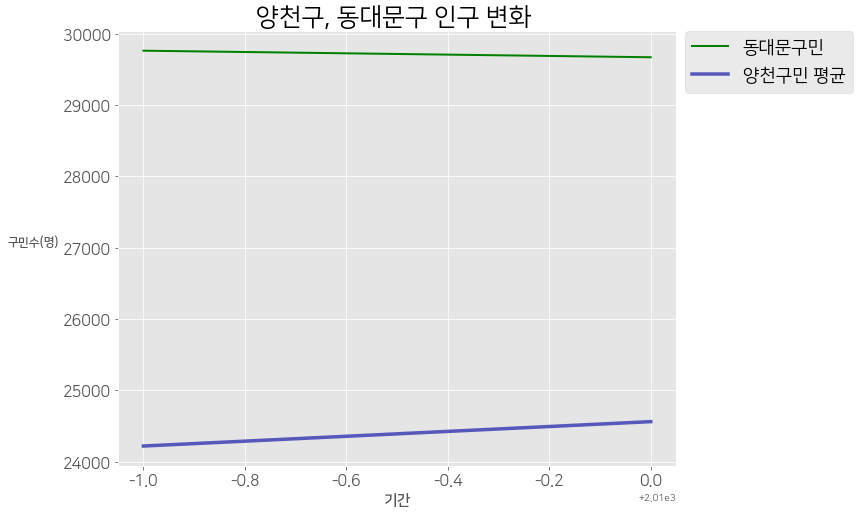

In [ ]:
fig =plt.figure(figsize = (10,8))
ax = fig.add_subplot(1,1,1)

plt.style.use('ggplot')

plt.plot(dong_id.index, dong_id.values,linewidth = 2,color = 'green', label = '동대문구민')
plt.plot(yang_id.index, yang_id.values,linewidth = 3.5,color = '#5758BB', label = '양천구민 평균')

ax.legend(loc = 'higher left', bbox_to_anchor=(1, 1.02))

plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

ax.set_title('양천구, 동대문구 인구 변화 ', size =25)
ax.set_xlabel('기간',fontweight='bold', size = 15)
ax.set_ylabel('구민수(명)',fontweight='bold', size = 12,rotation=0, labelpad= 30)

In [ ]:
#폐기불 처리 데이터
burn = pd.read_csv('2018burn.txt', error_bad_lines=False, sep = '\t', thousands = ',', skiprows=1)

In [ ]:
burn1 = burn.drop([0,1],0)
burn1

,기간,구분,발생량,소계,재활용,음식물,소각,매립
2,2018,종로구,362.7,234.7,133.9,100.8,86.1,41.9
3,2018,중구,429.7,241.5,126.7,114.8,147.0,41.2
4,2018,용산구,288.4,193.0,118.9,74.1,74.5,20.9
5,2018,성동구,270.0,178.9,94.7,84.2,63.2,27.9
6,2018,광진구,342.5,263.3,168.2,95.1,57.5,21.7
7,2018,동대문구,416.3,305.9,208.3,97.6,89.1,21.3
8,2018,중랑구,391.9,281.7,192.9,88.8,84.2,26.0
9,2018,성북구,348.5,249.8,155.8,94.0,85.3,13.4
10,2018,강북구,230.6,155.4,79.5,75.9,69.1,6.1
11,2018,도봉구,255.7,188.1,109.8,78.3,59.6,8.0


In [ ]:
from sklearn.preprocessing import StandardScaler

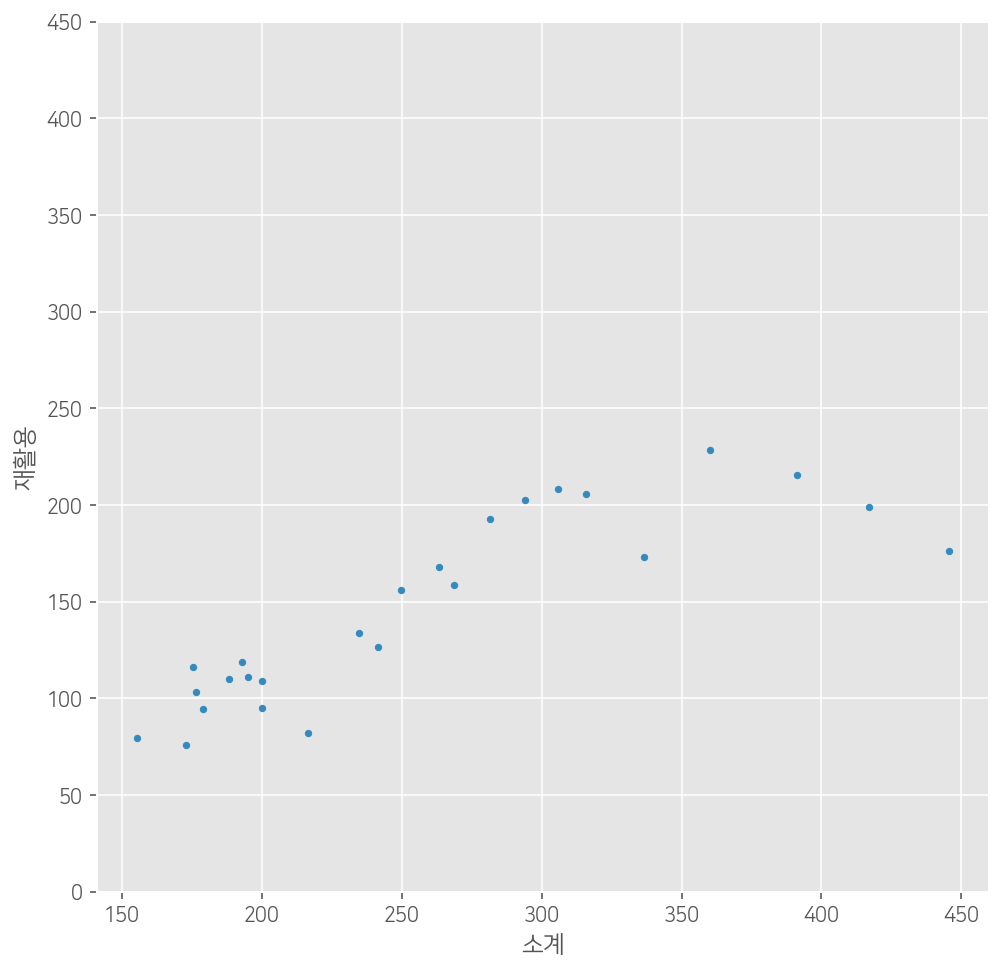

In [ ]:
#서울시 지역구 데이터 범주화 전 작업
burn1.plot(kind = 'scatter', x = '소계', y = '재활용', s = 10, figsize = (8,8))
plt.ylim(0, 450)
plt.ylim(0, 450)
ax.set_aspect('equal')